# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import stats as st
# импортируем необходимые библиотеки

### 1-ый регион

In [2]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
# открываем датасет первого региона

In [3]:
df_1.info()
# смотрим общую информацию о датаесете

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 5 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   id       100000 non-null  object 

 1   f0       100000 non-null  float64

 2   f1       100000 non-null  float64

 3   f2       100000 non-null  float64

 4   product  100000 non-null  float64

dtypes: float64(4), object(1)

memory usage: 3.8+ MB


In [4]:
df_1.head()
# выводим первые пять строк датасета для ознакомления

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [5]:
df_1.describe()
# смотрим информацию о данных датасета

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [6]:
df_1.isna().sum()
# смотрим количество пропусков

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [7]:
df_1.duplicated().sum()
# смотрим количество дубликатов

0

### 2-ой регион

In [8]:
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
# открываем датасет второго региона

In [9]:
df_2.info()
# смотрим общую информацию о датасете

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 5 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   id       100000 non-null  object 

 1   f0       100000 non-null  float64

 2   f1       100000 non-null  float64

 3   f2       100000 non-null  float64

 4   product  100000 non-null  float64

dtypes: float64(4), object(1)

memory usage: 3.8+ MB


In [10]:
df_2.head()
# выводим первые пять строк датасета для ознакомления

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [11]:
df_2.describe()
# смотрим информацию о данных датасета

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [12]:
df_2.isna().sum()
# смотрим количество пропусков

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
df_2.duplicated().sum()
# смотрим количество дубликатов

0

### 3-ий регион

In [14]:
df_3 = pd.read_csv('/datasets/geo_data_2.csv')
# открываем датасет третьего региона

In [15]:
df_3.info()
# смотрим общую инфомацию о датасете

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 100000 entries, 0 to 99999

Data columns (total 5 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   id       100000 non-null  object 

 1   f0       100000 non-null  float64

 2   f1       100000 non-null  float64

 3   f2       100000 non-null  float64

 4   product  100000 non-null  float64

dtypes: float64(4), object(1)

memory usage: 3.8+ MB


In [16]:
df_3.head()
# выводим первые пять строк для ознакомления

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [17]:
df_3.describe()
# смотрим информацию о данных датасета

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [18]:
df_3.isna().sum()
# смотрим количество пропусков

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [19]:
df_3.duplicated().sum()
# смотрим количество дубликатов

0

### Вывод.

В каждом наборе данных по сто тысяч строк. Проблем (пропусков, дубликатов и т.д.) в данных не обнаружено, значения признаков одного порядка, масштабировать их нет необходимости. Данные можно запускать в работу.

## Обучение и проверка модели

### 1-ый регион

In [20]:
features_1 = df_1.drop(['id', 'product'], axis=1) 
target_1 = df_1['product']
# готовим параметры для обучения и проверки модели

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_1, target_1, test_size=0.25, random_state=12345)
# разделяем параметры на тренировочные и валидацинные

In [22]:
features_train.shape
# смотрим размер

(75000, 3)

In [23]:
target_train.shape
# смотрим размер

(75000,)

In [24]:
features_valid.shape
# смотрим размер

(25000, 3)

In [25]:
target_valid.shape
# смотрим размер

(25000,)

In [26]:
model_1 = LinearRegression() 
model_1.fit(features_train, target_train)
# обучаем модель
predictions_valid_1 = model_1.predict(features_valid) 
# получаем предсказания модели на валидационной выборке

In [27]:
result_1 = mean_squared_error(target_valid, predictions_valid_1) ** 0.5
# считаем метрику rmse модели

In [28]:
print("RMSE модели линейной регрессии на валидационной выборке:", result_1)
print('Средний запас предсказанного сырья:', predictions_valid_1.mean())

RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813

Средний запас предсказанного сырья: 92.59256778438035


In [29]:
predictions_valid_1.shape
# смотрим размер

(25000,)

In [30]:
pred_val_1 = pd.Series(predictions_valid_1, name='predictions')
pd.concat([pred_val_1, target_valid.reset_index(drop=True)], axis=1).head()
# сравниваем предсказаные и реальные значения

,predictions,product
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180


### 2-ой регион

In [31]:
features_2 = df_2.drop(['id', 'product'], axis=1) 
target_2 = df_2['product']
# готовим параметры для обучения и проверки модели

In [32]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_2, target_2, test_size=0.25, random_state=12345)
# разделяем параметры на тренировочные и валидацинные

In [33]:
model_2 = LinearRegression() 
model_2.fit(features_train, target_train) 
# обучаем модель
predictions_valid_2 = model_2.predict(features_valid) 
# получаем предсказания модели на валидацинной выборке

In [34]:
result_2 = mean_squared_error(target_valid, predictions_valid_2) ** 0.5
# считаем метрику rmse модели

In [35]:
print("RMSE модели линейной регрессии на валидационной выборке:", result_2)
print('Средний запас предсказанного сырья:', predictions_valid_2.mean())

RMSE модели линейной регрессии на валидационной выборке: 0.893099286775617

Средний запас предсказанного сырья: 68.728546895446


In [36]:
pred_val_2 = pd.Series(predictions_valid_2, name='predictions')
pd.concat([pred_val_2, target_valid.reset_index(drop=True)], axis=1).head()
# сравниваем предсказаные и реальные значения

,predictions,product
0,82.663314,80.859783
1,54.431786,53.906522
2,29.748760,30.132364
3,53.552133,53.906522
4,1.243856,0.000000


### 3-ий регион

In [37]:
features_3 = df_3.drop(['id', 'product'], axis=1) 
target_3 = df_3['product']
# готовим параметры для обучения и проверки модели

In [38]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_3, target_3, test_size=0.25, random_state=12345)
# разделяем параметры на тренировочные и валидацинные

In [39]:
model_3 = LinearRegression() 
model_3.fit(features_train, target_train) 
# обучаем модель
predictions_valid_3 = model_3.predict(features_valid) 
# получаем предсказания модели на валидационной выборке

In [40]:
result_3 = mean_squared_error(target_valid, predictions_valid_3) ** 0.5
# считаем метрику rmse модели

In [41]:
print("RMSE модели линейной регрессии на валидационной выборке:", result_3)
print('Средний запас предсказанного сырья:', predictions_valid_3.mean())

RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434

Средний запас предсказанного сырья: 94.96504596800489


In [42]:
pred_val_3 = pd.Series(predictions_valid_3, name='predictions')
pd.concat([pred_val_3, target_valid.reset_index(drop=True)], axis=1).head()
# сравниваем предсказанные и реальные значения

,predictions,product
0,93.599633,61.212375
1,75.105159,41.850118
2,90.066809,57.776581
3,105.162375,100.053761
4,115.303310,109.897122


### Тоже самое, только перебором через цикл

In [43]:
data = [df_1, df_2, df_3]
for i in range(len(data)):
    features = data[i].drop(['id', 'product'], axis=1) 
    target = data[i]['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    model = LinearRegression() 
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid) 
    result = mean_squared_error(target_valid, predictions_valid) ** 0.5
    pred_val = pd.Series(predictions_valid, name='predictions')
    print(i+1, 'регион')
    print("RMSE модели линейной регрессии на валидационной выборке:", result)
    print('Средний запас предсказанного сырья:', predictions_valid.mean())
    print('Сравнение предсказаний и реальных значений:')
    display(pd.concat([pred_val, target_valid.reset_index(drop=True)], axis=1).head())
    print()
# делаем цикл, которые разделит подготовит параметры для обучения модели, обучит её и получит предсказания
# а также посчитает нам метрику rmse, средний запас предсказанного сырья 
# и сравнит предсказания с реальными значениями запасов нефти

1 регион

RMSE модели линейной регрессии на валидационной выборке: 37.5794217150813

Средний запас предсказанного сырья: 92.59256778438035

Сравнение предсказаний и реальных значений:


,predictions,product
0,95.894952,10.038645
1,77.572583,114.551489
2,77.892640,132.603635
3,90.175134,169.072125
4,70.510088,122.325180




2 регион

RMSE модели линейной регрессии на валидационной выборке: 0.893099286775617

Средний запас предсказанного сырья: 68.728546895446

Сравнение предсказаний и реальных значений:


,predictions,product
0,82.663314,80.859783
1,54.431786,53.906522
2,29.748760,30.132364
3,53.552133,53.906522
4,1.243856,0.000000




3 регион

RMSE модели линейной регрессии на валидационной выборке: 40.02970873393434

Средний запас предсказанного сырья: 94.96504596800489

Сравнение предсказаний и реальных значений:


,predictions,product
0,93.599633,61.212375
1,75.105159,41.850118
2,90.066809,57.776581
3,105.162375,100.053761
4,115.303310,109.897122


### Вывод.

В 1-ом и 3-ем регионе средние запасы предсказанного сырья примерно на одном уровне и существенно выше, чем во 2-от регионе, что говорит в их пользу при выборе региона для разработки. Но у них также существенно выше метрика rmse (среднеквадратическая ошибка), это говорит о том, что модели не очень хорошо предсказывают значения запасов нефти в этих регионах, сильно ошибаются. Это вызвано, скорее всего, большим разбросом в данных (в каких-то скважинах много нефти, в каких-то мало или нет совсем). Инвестиции в разработку добычи нефти в 1-ом и 3-ем регионе менее предсказумы, чем во 2-ом.

## Подготовка к расчёту прибыли

In [44]:
BUDGET = 10000000000 
# создаём переменную с бюджетом на разработку региона
QUANTITY = 200
# создаём переменную с количеством скважин, которые можем пробурить в регионе
NUMBER = 500
# создаём переменную с количеством скважин, которые можем исследовать в регионе
INCOME = 450000
# создаём переменную с выручкой за 1 тыс. баррель добытой нефти
print('Уровень безубыточности скважины:', int(BUDGET / (INCOME * QUANTITY)), 'тыс. барр.')
# считаем минимальный объём нефти, который должна дать скважина для выхода на безубыточность

Уровень безубыточности скважины: 111 тыс. барр.


In [45]:
pv_1 = pd.Series(predictions_valid_1)
pv_1.sort_values(ascending=False).head(200).sum() * 450000 - BUDGET

3996048877.46513

In [46]:
pv_2 = pd.Series(predictions_valid_2)
pv_2.sort_values(ascending=False).head(200).sum() * 450000 - BUDGET

2485712051.9735413

In [47]:
pv_3 = pd.Series(predictions_valid_3)
pv_3.sort_values(ascending=False).head(200).sum() * 450000 - BUDGET

3321754396.2432556

### Вывод.

Объём нефти, который должна дать скважина для выхода на безубыточность, составляет 111 тыс. баррелей, что ощутимо больше тех средних значений, которые были предсказаны нашими моделями.

Если бы мы могли исследовать 25000 точек, как наши модели на валидационной выборке, а не 500 (как указано в условиях задачи), и выбрать из них 200 лучших, то могли бы получить выручку от добычи в пределах 2,4 - 4 млрд. руб. в зависимости от региона. Но и затраты на исследования составили в каждом регионе составили бы значительно большее количество средств и времени.

## Расчёт прибыли и рисков 

### Функция для расчета прибыли и рисков

In [48]:
def margin(predictions_valid, target, n):
    pv = pd.Series(predictions_valid)
    pv = pv.sort_values(ascending=False).head(n)
    selected = target[pv.index]
    return (selected.sum() * INCOME - BUDGET)
# создаём функцию для расчета прибыли

In [49]:
state = np.random.RandomState(12345)
# создаём переменную для рандомайзера

### 1-ый регион

In [50]:
values_1 = []
for i in range(1000):
    features_subsample = features_1.sample(n=NUMBER, replace=True, random_state=state)
    target_subsample = target_1[features_subsample.index]
    predictions_subsample = model_1.predict(features_subsample)
    values_1.append(margin(predictions_subsample, target_subsample.reset_index(drop=True), QUANTITY)) 
# методом бутстрепа просчитываем распреление прибыли для 1-ого региона

In [51]:
values_1 = pd.Series(values_1)
# переводим данные из массива в Series для удобства

In [52]:
values_1.shape
# смотрим размер

(1000,)

In [53]:
print('Вероятность получения убытка:', ((values_1 < 0).mean()) * 100, '%')

Вероятность получения убытка: 5.2 %


In [54]:
print('Среднее значение прибыли:', values_1.mean())
# считаем среднее значение прибыли

Среднее значение прибыли: 424149751.404505


In [55]:
print('95%-ный доверительный интервал:', values_1.quantile(0.025), ':', values_1.quantile(0.975))
# считаем 95% доверительный интервал

95%-ный доверительный интервал: -77856923.73488918 : 968580699.5986103


<AxesSubplot:>

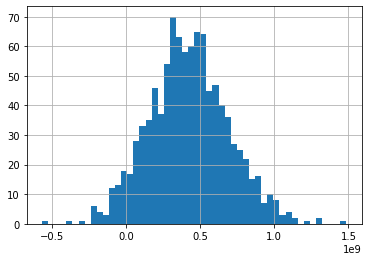

In [56]:
values_1.hist(bins=50)
# строим гистограмму распределения прибыли

### 2-ой регион

In [57]:
values_2 = []
for i in range(1000):
    features_subsample = features_2.sample(n=NUMBER, replace=True, random_state=state)
    target_subsample = target_2[features_subsample.index]
    predictions_subsample = model_2.predict(features_subsample)
    values_2.append(margin(predictions_subsample, target_subsample.reset_index(drop=True), QUANTITY)) 
# методом бутстрепа просчитываем распределение прибыли для 2-ого региона

In [58]:
values_2 = pd.Series(values_2)
# переводим из массива в Series для удобства

In [59]:
values_2.shape

(1000,)

In [60]:
print('Вероятность получения убытка:', values_2[values_2 < 0].count() / 10, '%')

Вероятность получения убытка: 1.0 %


In [61]:
print('Среднее значение прибыли:', values_2.mean())
# считаем среднее значение прибыли

Среднее значение прибыли: 434821403.11898386


In [62]:
print('95%-ный доверительный интервал:', values_2.quantile(0.025), ':', values_2.quantile(0.975))
# считаем 95% доверительный интервал

95%-ный доверительный интервал: 42419636.33193002 : 803845113.817385


<AxesSubplot:>

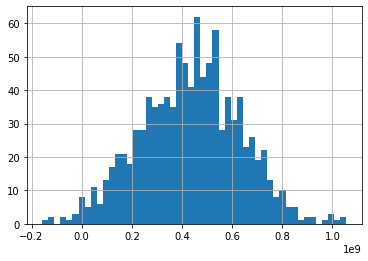

In [63]:
values_2.hist(bins=50)
# смотрим гистограмму распределения прибыли

### 3-ий регион

In [64]:
values_3 = []
for i in range(1000):
    features_subsample = features_3.sample(n=NUMBER, replace=True, random_state=state)
    target_subsample = target_3[features_subsample.index]
    predictions_subsample = model_3.predict(features_subsample)
    values_3.append(margin(predictions_subsample, target_subsample.reset_index(drop=True), QUANTITY)) 
# методом бутстрепа просчитываем распределение прибыли для 3-его региона

In [65]:
values_3 = pd.Series(values_3)
# переводим из массива в Series для удобства

In [66]:
values_3.shape

(1000,)

In [67]:
print('Вероятность получения убытков:', values_3[values_3 < 0].count() / 10, '%')

Вероятность получения убытков: 8.2 %


In [68]:
print('Среднее значение прибыли:', values_3.mean())
# считаем среднее значение прибыли

Среднее значение прибыли: 386536639.26003146


In [69]:
print('95%-ный доверительный интервал:', values_3.quantile(0.025), ':', values_3.quantile(0.975))
# считаем 95% доверительный интервал

95%-ный доверительный интервал: -146701548.14414728 : 878420027.4055198


<AxesSubplot:>

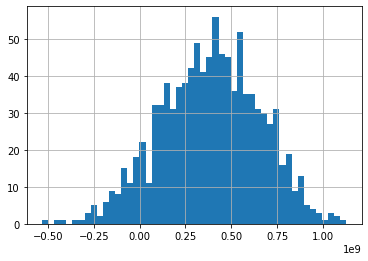

In [70]:
values_3.hist(bins=50)
# строим гистограмму распределения прибыли

### Вывод.

В 1-ом и 3-ем регионе вероятность получить убыток выше 2,5%, поэтому их для разработки мы рассматривать не можем.

Вероятность убытка ниже 2,5% и наибольшее среднее значение прибыли показывает 2-ой регион, несмотря на то, что по итогам обучения моделей и проверки на валидационной выборке среднее предсказанное значение запасов нефти в нём было наименьшим. Объяснить это можно тем, что в этом регионе модель давала наиболее близкие к реальным значениям предсказания. Следовательно, его и будем рекомендовать для разработки как наиболее предсказуемый и соответсвующий условиям задачи.